In [57]:
from sklearn.datasets import fetch_openml

In [58]:
dataset= fetch_openml("mnist_784")

In [59]:
X,y = dataset["data"], dataset["target"]


In [60]:
X = X/255.0 #broadcasting normalize
X.shape
y.shape

(70000,)

In [61]:
import matplotlib.pyplot as plt

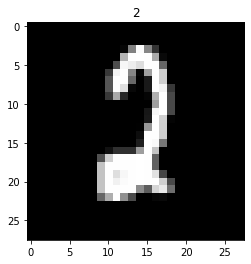

In [62]:
i=10100
img_1=X[i,:].reshape(28,28)
plt.imshow(img_1,cmap="gray")
plt.title(y[i])
plt.show()

In [63]:
import numpy as np

y_new = np.zeros(y.shape)
y_new[np.where(y == 0.0)[0]] = 1
y = y_new

In [64]:
m = 25000
m_test= X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
y_train, y_test = y[:m].reshape(1,m), y[m:].reshape(1,m_test)

In [65]:
np.random.seed(138)
shuffle_index = np.random.permutation(m)
X_train, y_train = X_train[:,shuffle_index], y_train[:,shuffle_index]

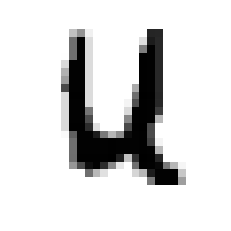

[0.]


In [66]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

i = 3
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_train[:,i])

In [67]:
def sigmoid(z):
    s = 1 / (1  + np.exp(-z))
    return s

In [68]:
epsilon = 1e-5

def compute_loss(Y, Y_hat):
    
    m = Y.shape[1]
    L = -(1./m) * (np.sum( np.multiply(np.log(Y_hat + epsilon),Y)) + np.sum(np.multiply(np.log(1-Y_hat),(1-Y))))
    
    return L

In [69]:
learning_rate = 1

X = X_train
Y = y_train

n_x = X.shape[0]
m = X.shape[1]

W = np.random.randn(n_x, 1) * 0.01
b = np.zeros((1, 1))

for i in range(2000):
    Z = np.matmul(W.T, X) + b
    A = sigmoid(Z)

    cost = compute_loss(Y, A)

    dW = (1/m) * np.matmul(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y, axis=1, keepdims=True)

    W = W - learning_rate * dW
    b = b - learning_rate * db

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  0.7077426710997566
Epoch 100 cost:  1.2368921026333882e-05
Epoch 200 cost:  1.2222050423580415e-05
Epoch 300 cost:  1.2078894629201582e-05
Epoch 400 cost:  1.1939310504073507e-05
Epoch 500 cost:  1.1803162270689556e-05
Epoch 600 cost:  1.1670321042192664e-05
Epoch 700 cost:  1.1540664387289435e-05
Epoch 800 cost:  1.1414075927881659e-05
Epoch 900 cost:  1.1290444966573943e-05
Epoch 1000 cost:  1.1169666141494102e-05
Epoch 1100 cost:  1.1051639106103099e-05
Epoch 1200 cost:  1.0936268231907693e-05
Epoch 1300 cost:  1.082346233218155e-05
Epoch 1400 cost:  1.0713134404969568e-05
Epoch 1500 cost:  1.0605201393824866e-05
Epoch 1600 cost:  1.0499583964862707e-05
Epoch 1700 cost:  1.0396206298832184e-05
Epoch 1800 cost:  1.0294995897052825e-05
Epoch 1900 cost:  1.0195883400125781e-05
Final cost: 1.0099763383293808e-05


In [70]:
from sklearn.metrics import classification_report, confusion_matrix

Z = np.matmul(W.T, X_test) + b
A = sigmoid(Z)

predictions = (A>.5)[0,:]
labels = (y_test == 1)[0,:]

print(confusion_matrix(predictions, labels))

[[45000]]


In [71]:
print(classification_report(predictions, labels))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     45000

    accuracy                           1.00     45000
   macro avg       1.00      1.00      1.00     45000
weighted avg       1.00      1.00      1.00     45000

